In [1]:
import pandas as pd 
import matplotlib as plt 
import seaborn as sns

# Seaborn is an open-source Python library built on top of matplotlib. It is used for data visualization and exploratory
# data analysis. Seaborn works easily with dataframes and the Pandas library. The graphs created can also be customized easily.

import numpy as np
%matplotlib inline


In [2]:
df = pd.read_csv(r'zomato.csv',encoding='latin-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [3]:
df.head(2)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


In [4]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [5]:
# # In  data analysis what all we do
# 1.Missing values
# 2.Explore Numerical varaiables
# 3.Explore categorical variables
# 4.Finding Relationship btw features  


In [6]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [7]:
# or we can use list comprehension
# so we see from both ways cuisines is the only column with null values

[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

<AxesSubplot:>

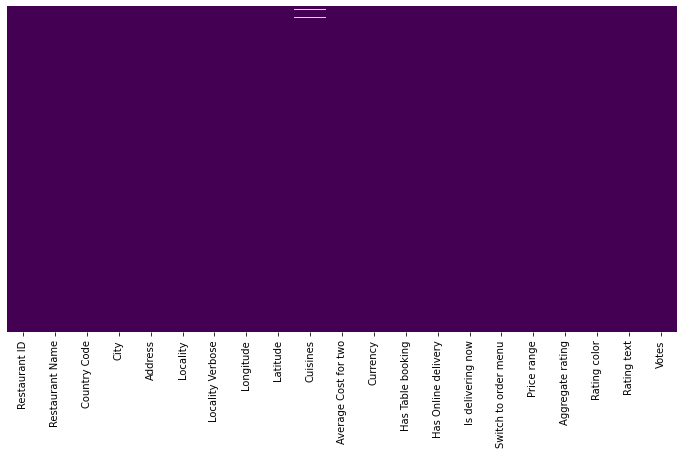

In [36]:
# using heat map
plt.rcParams['figure.figsize'] = (12,6)              # resize the diagram to see the anomaly clearly
sns.heatmap(df.isnull(),yticklabels=False , cbar= False , cmap='viridis')

In [9]:
df_country = pd.read_excel('Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [10]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [11]:
# we merge df nd df_country on country code parameter amd merge where in left table.
final_df = pd.merge(df , df_country , on = "Country Code" , how = "left" )
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [ ]:
# to all unique values and group by all unique values
final_df['Country'].value_counts()                  # thus maximum transaction are happening in india

# pie chart

In [68]:
country_name = final_df['Country'].value_counts().index    # this gives all country names uniquely
country_name

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='object')

In [69]:
country_count = final_df['Country'].value_counts().values      # a.values will convert the numeric values in datframe  as numpy array 
country_count

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4], dtype=int64)

([<matplotlib.patches.Wedge at 0x271051f98e0>,
 [Text(-2.104512327586582, 0.6411145475155812, 'India'),
  Text(1.982265962568691, -0.954264980831646, 'United States'),
  Text(2.1145716592239485, -0.607113414451433, 'United Kingdom'),
  Text(2.140277633832038, -0.5091283238225242, 'Brazil'),
  Text(2.1587013628959517, -0.4242739985329765, 'UAE'),
  Text(2.173762294489946, -0.33875874461599637, 'South Africa'),
  Text(2.183727182366407, -0.2670872385458972, 'New Zealand'),
  Text(2.1895807628032893, -0.21385996156776607, 'Turkey'),
  Text(2.193262047890764, -0.17205112403588677, 'Australia'),
  Text(2.195614145955291, -0.13884711765470437, 'Phillipines'),
  Text(2.1973583088030417, -0.10777969537086426, 'Indonesia'),
  Text(2.198611969748473, -0.07813710052682607, 'Singapore'),
  Text(2.1994497016564245, -0.04920375883473256, 'Qatar'),
  Text(2.199906692435927, -0.02026189960543289, 'Sri Lanka'),
  Text(2.199998095510683, -0.0028947796753415276, 'Canada')])

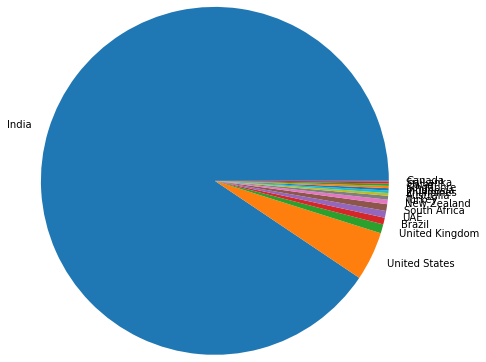

In [15]:
# pie chart
plt.pyplot.pie(country_count , labels=country_name , radius=2)             # But this looks jumbled up   

([<matplotlib.patches.Wedge at 0x27106259130>,
 [Text(-2.1659485401904206, 0.3855734965567345, 'India'),
  Text(2.154563431676712, -0.44481054268246595, 'United States'),
  Text(2.199173030764607, -0.06031567588624146, 'United Kingdom')],
 [Text(-1.181426476467502, 0.21031281630367335, '94.39%'),
  Text(1.1752164172782065, -0.24262393237225413, '4.73%'),
  Text(1.1995489258716037, -0.03289945957431352, '0.87%')])

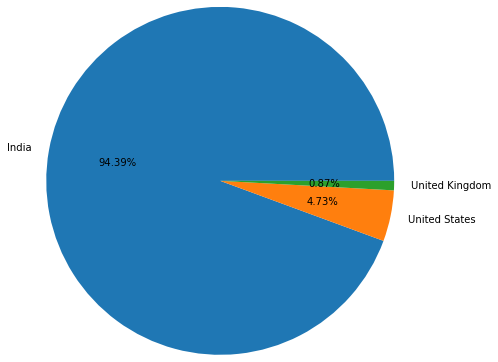

In [16]:
# so lets make for top three
# autopct='%1.2f%%'     this give the percentahe upto 2 decimel points    '%1.3f%%' for 3 decimal points 
plt.pyplot.pie(x=country_count[:3] , labels=country_name[:3] , radius=2 , autopct='%1.2f%%' )

In [17]:
# observation max outlets are from india as per pie chart

In [18]:
final_df.columns


Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [27]:
# using groupby >>> size to get raw size data >>> reseting index to get data in dataframe type >>> renaming the index
rating_df = final_df.groupby(['Aggregate rating', 'Rating color', 'Rating text']).size().reset_index().rename(columns={0:'Rating Count'})
rating_df

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


## Obseravations 
##### 1. when the rating is bt 4.9 to 4.5 >> food is Excellent
##### 2. when the rating is bt 4.4 to 4.0 >> food is Very good
##### 3. when the rating is bt 3.9 to 3.5 >> food is Good
##### 4. when the rating is bt 3.4 to 2.5 >> food is Average
##### 5. when the rating is <<     2.4    >> food is Poor


In [29]:
rating_df.head()

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

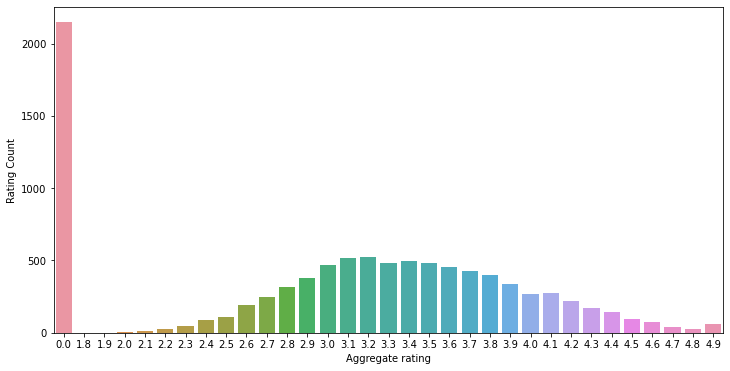

In [35]:
plt.rcParams['figure.figsize'] = (12,6)
sns.barplot(x='Aggregate rating',y='Rating Count',data=rating_df)

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

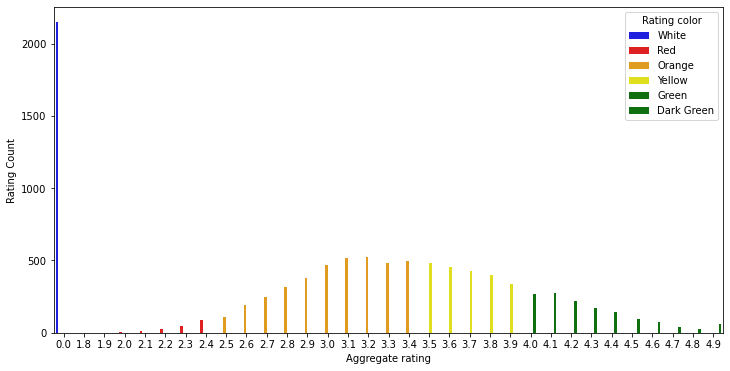

In [43]:
plt.rcParams['figure.figsize'] = (12,6)
sns.barplot(x='Aggregate rating',y='Rating Count', hue = 'Rating color' ,data=rating_df , palette= ['blue','Red','Orange','Yellow','Green','Green'] )

In [ ]:
# observation :
##### not rated count is vry high
##### max rating btw 2.5 and 3.4
##### for missing values we can use average

In [ ]:
# find the countries that has given 0 rating 

In [53]:
country_0_rating = final_df.groupby(['Aggregate rating' , 'Country']).size().reset_index ().rename(columns={0:'Count'}).head()
country_0_rating

,Aggregate rating,Country,Count
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


In [55]:
# find out which currency is used by which company
final_df.groupby(['Country','Currency']).size().reset_index().rename(columns={0:'count'})

,Country,Currency,count
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [66]:
# which countries have online delivery index both yes and no.
final_df.groupby(['Country','Has Online delivery']).size().reset_index().rename(columns={0:'count'})

,Country,Has Online delivery,count
0,Australia,No,24
1,Brazil,No,60
2,Canada,No,4
3,India,No,6229
4,India,Yes,2423
5,Indonesia,No,21
6,New Zealand,No,40
7,Phillipines,No,22
8,Qatar,No,20
9,Singapore,No,20


In [60]:
# which countries have online delivery index
final_df[(final_df['Has Online delivery']=='Yes')].groupby(final_df['Country']).size().reset_index().rename(columns={0:"count"})

,Country,count
0,India,2423
1,UAE,28


In [64]:
# or 
final_df[final_df['Has Online delivery']=='Yes']['Country'].value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [ ]:
# observation   : online delivery was done in  India and Uae

In [ ]:
# create a pie chart for city ditribution

# imp

In [114]:
city_name = final_df['City'].value_counts().index
city_name

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', length=141)

In [111]:
city_count = final_df['City'].value_counts().values
city_count

array([5473, 1118, 1080,  251,   25,   21,   21,   21,   21,   21,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         20,   20,   20,   20,   20,   20,   20,   20,   20,   20,   20,
         18,   18,   16,   14,   11,    6,    4,    4,    3,    3,    2,
          2,    2,    2,    2,    2,    2,    2,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1], dtype=int64)

([<matplotlib.patches.Wedge at 0x27113706e20>,
 [Text(-1.2290705648371865, 1.8246603921417266, 'New Delhi'),
  Text(0.1247350502396108, -2.1964610552526813, 'Gurgaon'),
  Text(1.7578090451250736, -1.3229162335070492, 'Noida'),
  Text(2.1844436836446874, -0.2611623881511845, 'Faridabad'),
  Text(2.199892560011224, -0.021742226364059848, 'Ghaziabad')],
 [Text(-0.670402126274829, 0.995269304804578, '68.87%'),
  Text(0.0680373001306968, -1.1980696665014623, '14.07%'),
  Text(0.9588049337045855, -0.7215906728220267, '13.59%'),
  Text(1.1915147365334657, -0.14245221171882788, '3.16%'),
  Text(1.1999413963697583, -0.011859396198578098, '0.31%')])

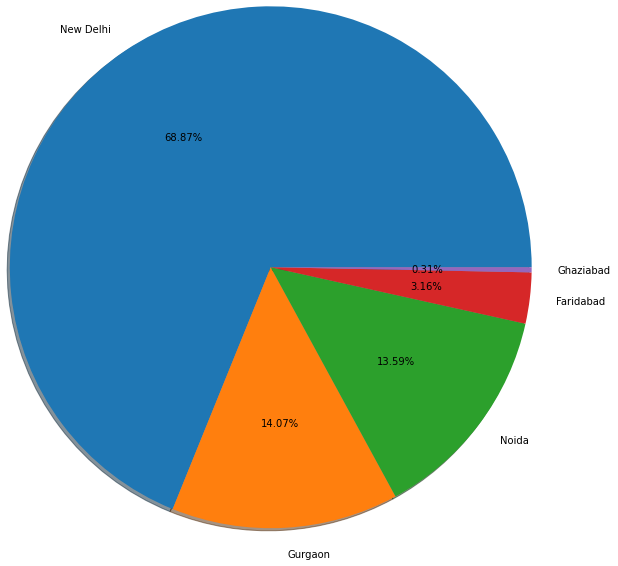

In [112]:
plt.pyplot.pie(x=city_count[:5] ,labels=city_name[:5] , autopct='%1.2f%%',shadow=True,radius=2)

In [90]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [123]:
# find top  10 cuisiens names with numbers
final_df['Cuisines'].value_counts().head(10)

North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: Cuisines, dtype: int64

In [119]:
# find top  10 cuisiens only  names 
final_df['Cuisines'].value_counts().head(10).index

Index(['North Indian', 'North Indian, Chinese', 'Chinese', 'Fast Food',
       'North Indian, Mughlai', 'Cafe', 'Bakery',
       'North Indian, Mughlai, Chinese', 'Bakery, Desserts', 'Street Food'],
      dtype='object')